In [1]:
import pandas as pd
import numpy as np

Загрузим данные с https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page за декабрь 2019 года и январь 2020 года, затем обединим их в один датафрейм.

In [2]:
df_1 = pd.read_csv('data\\yellow_tripdata_2019-12.csv')
df_1.head()

d:\work\citymobile\.venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,N,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.3,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,N,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.8,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,N,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.8,2.5


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896317 entries, 0 to 6896316
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 947.1+ MB


In [3]:
df_2 = pd.read_csv('data\\yellow_tripdata_2020-01.csv')
df_2.head()

d:\work\citymobile\.venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [4]:
df = pd.concat([df_1, df_2], ignore_index=True)
del df_1, df_2

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.loc[df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
df.loc[df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13301325 entries, 0 to 13301324
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2)

In [6]:
df.loc[:, 'payment_type':'congestion_surcharge'] = df.loc[:, 'payment_type':'congestion_surcharge'].astype(np.float32)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.2,1.0,0,142,116,2.0,14.5,3.0,0.5,0.0,0.0,0.3,18.299999,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.0,1.0,0,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.800000,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.0,1.0,0,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.800000,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.4,1.0,0,138,25,1.0,28.5,0.5,0.5,10.0,0.0,0.3,39.799999,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.6,1.0,0,161,237,2.0,9.0,3.0,0.5,0.0,0.0,0.3,12.800000,2.5


# Как стоимость поездки скоррелирована с другими факторами?

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

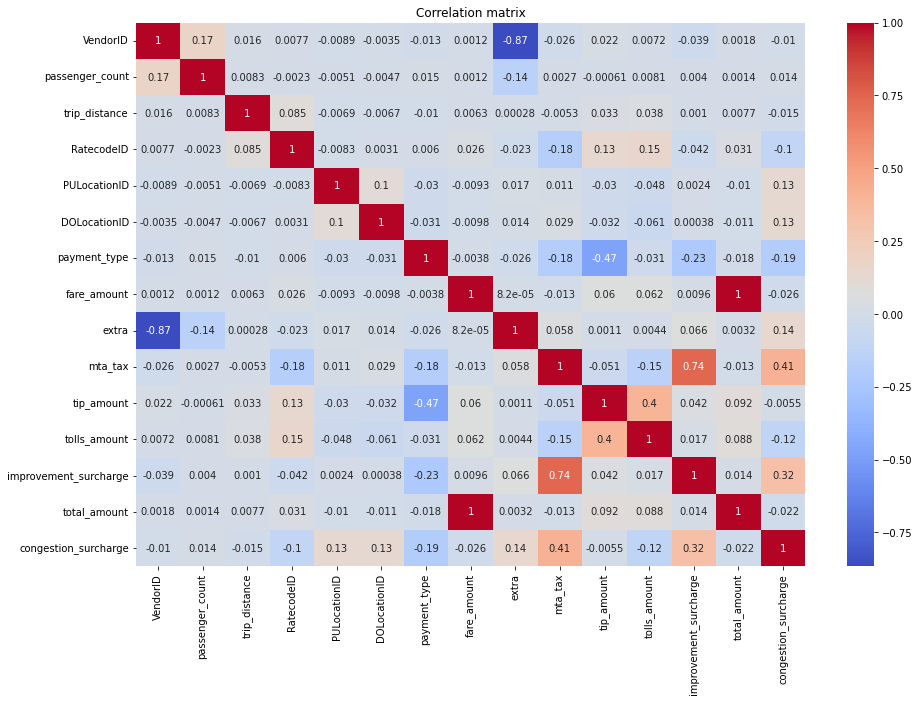

In [8]:
fig = plt.figure(figsize = (15, 10))

plt.title('Correlation matrix')

sns.heatmap(df.corr(method='pearson'), cmap = 'coolwarm', annot = True, annot_kws = {'fontsize' : 10})

plt.show()

Для ответа на вопрос, можно посмотреть на строку (столбец) total amount. Наибольшее значение коэффициента корреляции Пирсона между total amount и fare_amount (1), в этой переменной указано значение стоимости поездки, которая рассчитывалась по таксометру. Коэффициент корреляции между этими признаками равен 1, что вполне резонно, так как полная стоимость поездки вполне естественно должна зависить от киллометража и времени поездки, которые учитываются в таксометре при расчете (принцип рпботы таксометра можно найти на вкипедии, что я и сделал). И в основном, базовая стоимость поездки определяется таксометром, но может изменяться в зависимости от стоимости подачи, района назначения и старта, чаевых. 

Следующими по абсолютному значению коэффициента корреляций являются столбцы с количеством чаевых (tip amount) и общей суммой оплаченных сборов (tolls amount). Это естественно, что полная стоимость поездки задается как некоторое взвешенное от базового тарифа (расчет таксометра), сборов (подача машины, район старта и конца поездки, времени суток) и чаевых. И тип зависимости может быть нелинейным, но монотонно неубывающим.  

# Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Так как датасет содержит признаки разного типа, и у нас нету примеров аномальных поездок, то стоит попробовать алгоритм изолирующего леса, так как хорошо зарекомендовал себя в таких задачах. Isolation Forest – это одна из вариаций идеи случайного леса. 

Логика алгоритма: при описанном «случайном» способе построения деревьев выбросы будут попадать в листья на ранних этапах (на небольшой глубине дерева), т.е. выбросы проще «изолировать».

In [7]:
from sklearn.ensemble import IsolationForest

In [10]:
clf = IsolationForest(random_state=241, verbose=10, bootstrap=True, n_jobs=-1)
outliers_mask = clf.fit_predict(df)

ValueError: could not convert string to float: '2019-12-01 00:26:58'

# Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

# Из данных постройте модель, которая описывает тариф

# Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.